### Importing the Libraries

In [57]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina'
import seaborn as sns
import numpy as np

### Data Preprocessing



In [58]:
data=pd.read_csv('data.csv')
data['diagnosis1']=pd.get_dummies(data['diagnosis'],drop_first=True)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,diagnosis1
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1


In [59]:
data.drop(['diagnosis','id','Unnamed: 32'],axis=1,inplace=True)

### Spliting the data to Training_data and Testing_data

In [60]:

data_train, data_test = train_test_split(data, random_state=42)


In [61]:
data_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis1
287,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,15.54,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,0
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.3856,0.5106,0.20510,0.3585,0.11090,1
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,24.61,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247,0
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,38.54,145.40,1437.0,0.14010,0.3762,0.6399,0.19700,0.2972,0.09075,1
210,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,27.84,158.30,1656.0,0.11780,0.2920,0.3861,0.19200,0.2909,0.05865,1


### PCA Analysis anf calculating Principal Component

In [62]:
# Load in the data
df = data_train
# Standardize the data to have a mean of ~0 and a variance of 1
X_std = StandardScaler().fit_transform(df)
# Create a PCA instance: pca
pca = PCA(n_components=31)
principalComponents = pca.fit_transform(X_std)
#print the Eigen Values and Principal components
print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Principal Components \n%s' %pca.components_)




Eigenvalues 
[1.37734476e+01 5.90864499e+00 2.93018031e+00 1.97367914e+00
 1.56284653e+00 1.23847861e+00 6.87352862e-01 5.15890622e-01
 4.12187324e-01 3.61191995e-01 3.25491064e-01 2.86953689e-01
 2.63908951e-01 2.19034234e-01 1.45925101e-01 8.21479759e-02
 6.91308615e-02 5.77880529e-02 5.07502974e-02 4.83970353e-02
 3.12014372e-02 2.88774452e-02 2.67255451e-02 2.47735899e-02
 1.68172551e-02 1.41320284e-02 7.96084986e-03 6.72277089e-03
 1.44126557e-03 7.43655144e-04 1.18080256e-04]
Principal Components 
[[ 2.13895587e-01  1.02717899e-01  2.22441224e-01  2.16034942e-01
   1.43068800e-01  2.31470432e-01  2.52017823e-01  2.57081681e-01
   1.45356336e-01  5.38972738e-02  1.99347511e-01  2.85925554e-02
   2.03686343e-01  1.94204316e-01  2.27912639e-02  1.58102682e-01
   1.48885620e-01  1.77460502e-01  4.66073883e-02  9.30280595e-02
   2.23681580e-01  1.07151225e-01  2.32873595e-01  2.20846663e-01
   1.27614992e-01  2.02420776e-01  2.26172485e-01  2.47064510e-01
   1.23315117e-01  1.1988003

### Ploting the PCA Components and Eigen Values

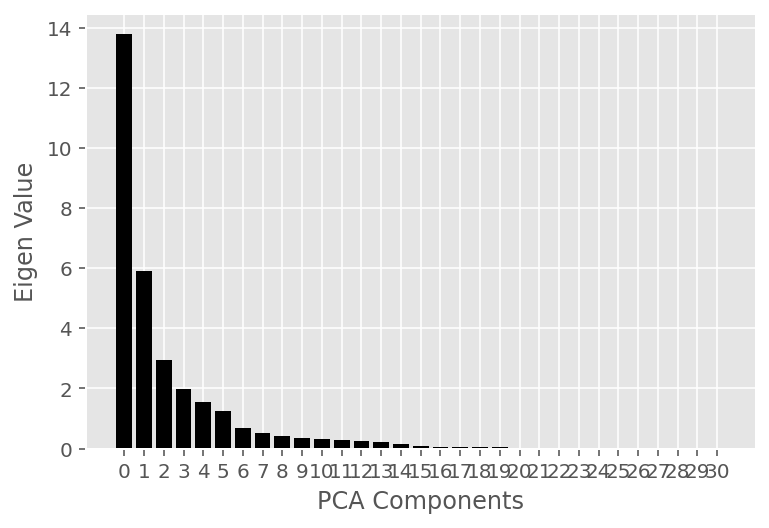

In [63]:
# Plot the explained eigen values
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_, color='black')
plt.xlabel('PCA Components')
plt.ylabel('Eigen Value')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

### Kaiser Rule

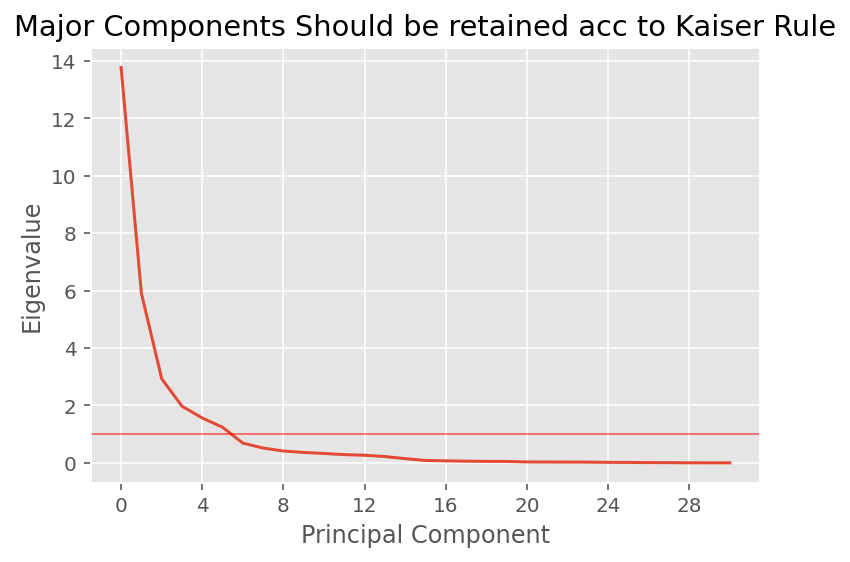

In [64]:
def screen_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Major Components Should be retained acc to Kaiser Rule')
    show()
    

screen_plot()

### Major components are as follows:-2,3,4,5

### Data Visualization Using Principal Components

In [65]:
def loadings():
    loadings = pca.components_
    results = pd.DataFrame(loadings)
    results.columns = ['Component 1', 'Component 2', 'Component 3', 'Component 4','Component 5', 'Component 6', 'Component 7', 'Component 8',
                      'Component 9', 'Component 10', 'Component 11', 'Component 12','Component 13', 'Component 14', 'Component 15', 'Component 16',
                      'Component 17', 'Component 18', 'Component 19', 'Component 20','Component 21', 'Component 22', 'Component 23', 'Component 24',
                      'Component 25', 'Component 26', 'Component 27', 'Component 28','Component 29', 'Component 30', 'Component 31']
   
    print(results)

loadings()

    Component 1  Component 2  Component 3  Component 4  Component 5  \
0      0.213896     0.102718     0.222441     0.216035     0.143069   
1     -0.230933    -0.051557    -0.212863    -0.226537     0.176579   
2      0.003330     0.040611     0.002849     0.041201    -0.123295   
3     -0.053899     0.602203    -0.055811    -0.067430    -0.124180   
4      0.047907     0.047544     0.047927     0.014967    -0.387391   
5      0.029248    -0.108352     0.025459     0.002697    -0.268866   
6     -0.141767     0.022454    -0.129597    -0.067110    -0.092436   
7     -0.012538     0.111087    -0.021453     0.033128    -0.308388   
8      0.160690    -0.261532     0.157687     0.161578     0.003772   
9      0.132919     0.018949     0.115392     0.166768    -0.149221   
10    -0.101357    -0.272680    -0.126321    -0.089156    -0.115585   
11     0.057500     0.174572     0.050051    -0.020450     0.081298   
12     0.053993     0.251246     0.042087     0.096363     0.286338   
13    

### Plotting of first Three Components

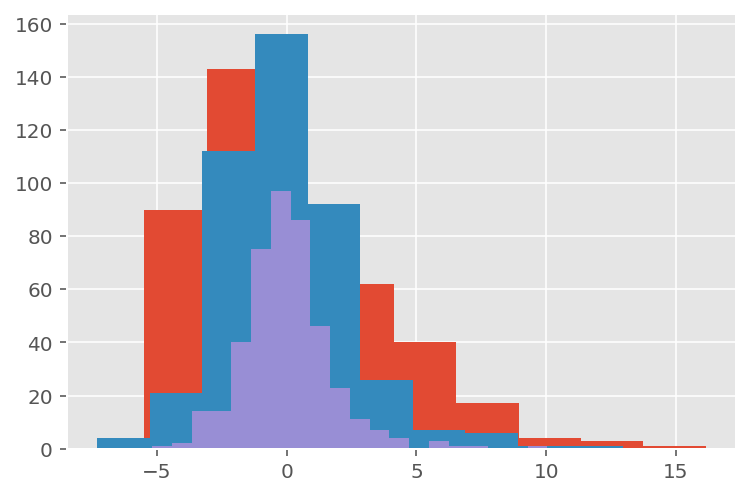

In [66]:
plt.style.use('ggplot')
plt.hist(PCA_components[0], bins=9)
plt.hist(PCA_components[1], bins=10)
plt.hist(PCA_components[2], bins=20)
plt.show()

### For Component 3 separation of class is better

### Plotting place and see the relationship between three components.

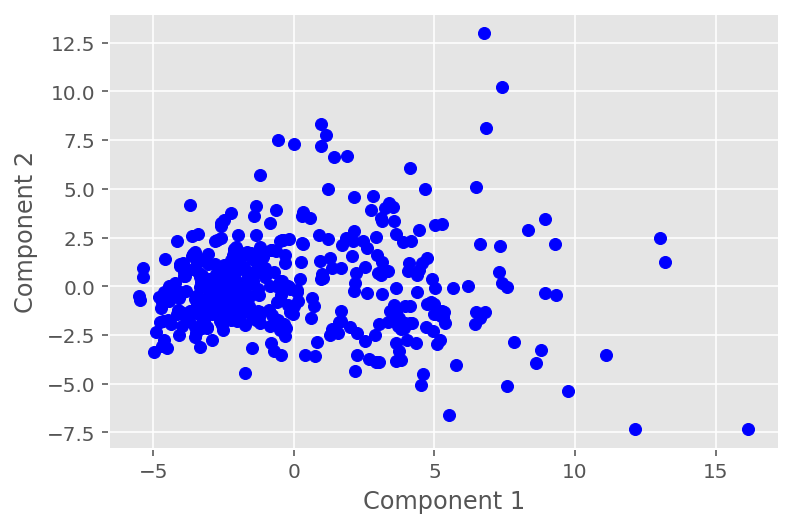

In [67]:
plt.scatter(PCA_components[0],PCA_components[1],color='b' ,cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

plt.show()
#in the first case visual separation of classes is better

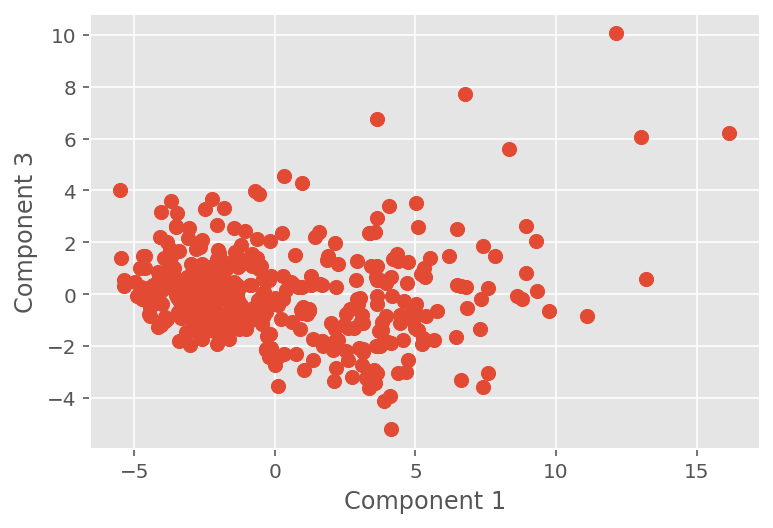

In [68]:
plt.scatter(PCA_components[0],PCA_components[2],s=50)
plt.xlabel('Component 1')
plt.ylabel('Component 3')

plt.show()


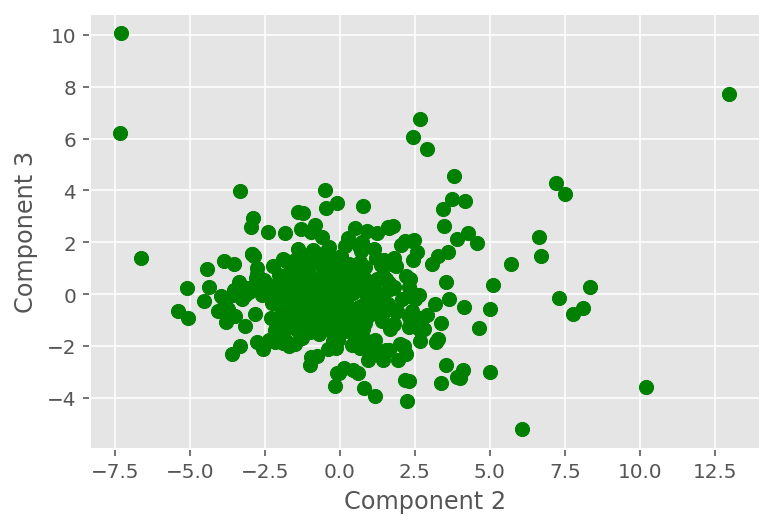

In [69]:
plt.scatter(PCA_components[1],PCA_components[2],s=50,c='g')
plt.xlabel('Component 2')
plt.ylabel('Component 3')

plt.show()

### K-means Clustering

In [70]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)
Y = tsne.fit_transform(df)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 426 samples in 0.016s...
[t-SNE] Computed neighbors for 426 samples in 0.022s...
[t-SNE] Computed conditional probabilities for sample 426 / 426
[t-SNE] Mean sigma: 24.860639
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.213348
[t-SNE] KL divergence after 2000 iterations: 0.177862


Text(0.5, 1.0, 'Actual clusters')

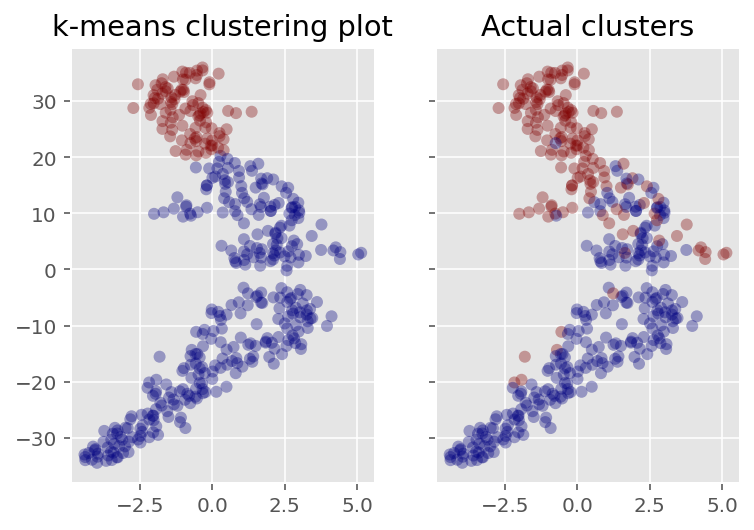

In [73]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=2, init='k-means++')
kY = kmns.fit_predict(data_train)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = data_train['diagnosis1'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

Text(0.5, 1.0, 'Actual clusters')

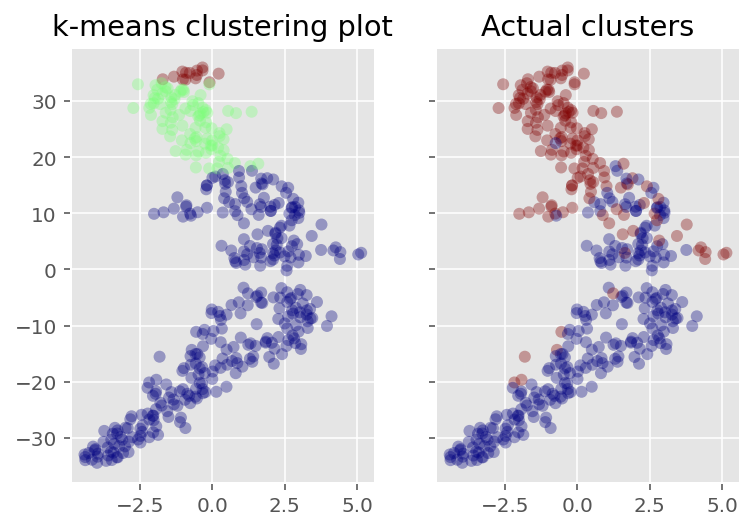

In [74]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=3)
kY = kmns.fit_predict(data_train)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = data_train['diagnosis1'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

Text(0.5, 1.0, 'Actual clusters')

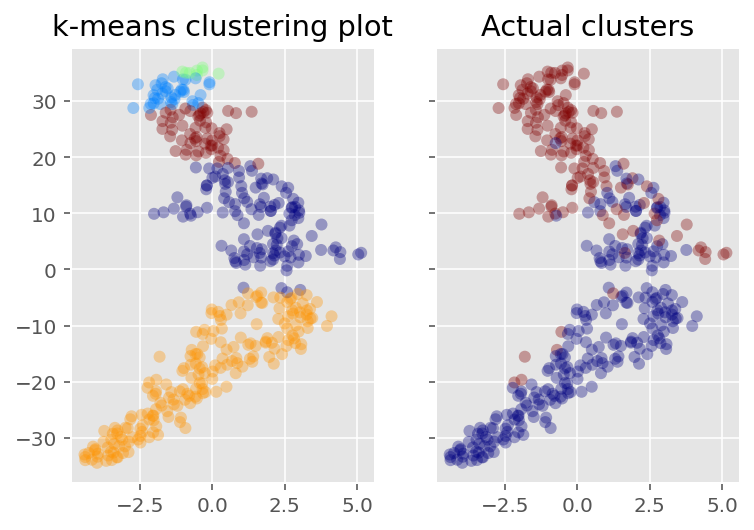

In [75]:
#Cluster using k-means
from sklearn.cluster import KMeans
kmns = KMeans(n_clusters=5, init='k-means++')
kY = kmns.fit_predict(data_train)

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.scatter(Y[:,0],Y[:,1],  c=kY, cmap = "jet", edgecolor = "None", alpha=0.35)
ax1.set_title('k-means clustering plot')

ax2.scatter(Y[:,0],Y[:,1],  c = data_train['diagnosis1'], cmap = "jet", edgecolor = "None", alpha=0.35)
ax2.set_title('Actual clusters')

### Purity of cluster k=2

In [76]:
X = np.array(data_train.drop(['diagnosis1'], 1).astype(float))
y=np.array(data_train['diagnosis1'])
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.8497652582159625


### Purity of cluster with k=3

In [77]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.8356807511737089


### Purity of the cluster with k=5

In [78]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print(correct/len(X))

0.2676056338028169


### In all of the three Cases k with value of 2,3 are close to 1 so we use both the cases for our Classification.